# Impact of Mutlicollinearity 

In this note, we will introduce multicolinearity, and explain how it influences regression analysis. We simulate data by generating dependent and independent variables.

### What is multicollinearity?

Collinearity occurs when two predictor variables (e.g., x1 and x2) in a multiple regression have a non-zero correlation. Multicollinearity occurs when more than two predictor variables (e.g., x1, x2 and x3) are inter-correlated. See [the Psychological Statistics blog](http://psychologicalstatistics.blogspot.com/2013/11/multicollinearity-and-collinearity-in.html).
In most situations in which you would use regression (apart from certain designed experiments) multicollinearity always exists. So if a method section ever claims that “multicollinearity is not present”, generally this will be untrue. A better statement to make is something along the lines of “there were no problems with multicollinearity.


### Does multicollinearity matter?

The existence of multicollinearity has no impact on the overall regression model. It also should not generally have an impact on predictions made using the overall model and $R^2$. However, if you are interested in the effects of individual predictors, like what predictors are more important, multicollinearity will be a big problem. In the following I will explain the impact by a simulation.

### How to detect multicollinearity?

To determine multicollinearity, we can compute [Variance Inflation Factor (VIF)](https://etav.github.io/python/vif_factor_python.html).

In [110]:
import sys

if '/Users/hhhung/anaconda/lib/python3.4/site-packages' not in sys.path:
    sys.path.append('/Users/hhhung/anaconda/lib/python3.4/site-packages')


import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
from sklearn import grid_search
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score, train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
%matplotlib inline

## Simulate data

We generate 2000 data points, each variable has a normal distribution and the target variable is obtained by the following relation:
$$ y = a+ bx_1 +cx_2 +dx_3 +ex_{col} + \epsilon,$$
where $x_{col}$ has relation with $x_1$ and $x_3$. We usually call $x_1, x_2, \cdots$, as predictors, or independent variables. $y$ is dependent (target) variable.

In [132]:
x1 = np.random.random_sample((2000,)) 
x2 = np.random.random_sample((2000,)) 
x3 = np.random.random_sample((2000,)) 
          
x_col = 2*x1       
err = np.random.normal(0, 10, 2000)

y = 10*x1 + 3*x2 + x3 + 4*x_col + err

data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x_col': x_col, 'y': y})

In the example, $a=0$, $b=10$, $c=3$, $d=1$ and $e=4$. There exists multicollinearity since $x_{col}$ is a linear combination in terms of $x_1$ and $x_3$. Therefore, the reduced relation should be 
$$ y = 18x_1 +3x_2 +x_3 + \epsilon.$$
Here we generate irreducible errors using a normal distribution with $\sigma=10$. Note that since the data are generated using standard normal distribution, we don't have to worry about the procedures to standardize variables. As long as the regression coefficients are significant, we can compare the amplitudes as importance. See [How to Identify the Most Important Predictor Variables in Regression Models](http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-identify-the-most-important-predictor-variables-in-regression-models).

In [38]:
data.head()

,x1,x2,x3,x_col,y
0,0.524387,0.978207,0.057427,5.343874,38.565558
1,0.814996,0.160209,0.626270,8.249964,52.327896
2,0.008605,0.833534,0.219359,0.186046,-0.093717
3,0.391307,0.915240,0.487689,4.013074,12.429257
4,0.731593,0.208704,0.840829,7.415927,32.273304


## Pearson's correlation


In [108]:
print (stats.pearsonr(x1, y))
print (stats.pearsonr(x2, y))
print (stats.pearsonr(x3, y))
print (stats.pearsonr(x_col, y))

(0.47825969322884698, 7.7466612747876968e-115)
(0.092185642624021416, 3.6452811056544282e-05)
(-0.036101299331034571, 0.10652396762121712)
(0.47825969322884698, 7.7466612747876968e-115)


The relation betweem $x_3$ and $y$ is not obvious. Both $x_1$ and $x_{col}$ are similarly important to $y$.

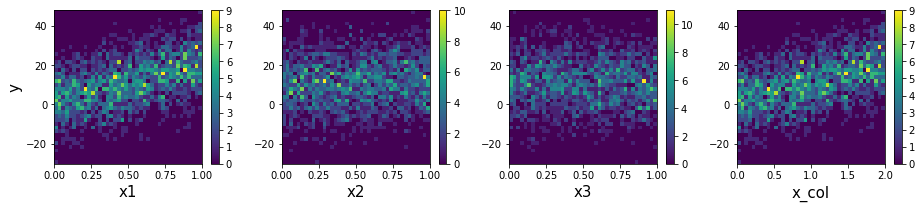

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(13, 3))
ax = plt.subplot(141)
plt.hist2d(x1, y, bins=40)
plt.xlabel('x1', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.colorbar()

ax = plt.subplot(142)
plt.hist2d(x2, y, bins=40)
plt.xlabel('x2', fontsize=15)
plt.colorbar()

ax = plt.subplot(143)
plt.hist2d(x3, y, bins=40)
plt.xlabel('x3', fontsize=15)
plt.colorbar()

ax = plt.subplot(144)
plt.hist2d(x_col, y, bins=40)
plt.xlabel('x_col', fontsize=15)
plt.colorbar()

fig.tight_layout()
plt.show()

## Ordinary least square on ALL variables

First let's simply take all predictors in regression. We have the mean absolute error 7.98 and $R^2$ = 0.61

In [133]:
X = data[['x1', 'x2', 'x3', 'x_col']]
Y = data['y']

model = sm.OLS(y, X).fit()
print (np.mean(abs(np.array(Y)-np.array(model.predict(X)))))
model.summary()

7.73983545012


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1040.
Date:                Tue, 06 Feb 2018   Prob (F-statistic):               0.00
Time:                        00:32:45   Log-Likelihood:                -7379.1
No. Observations:                2000   AIC:                         1.476e+04
Df Residuals:                    1997   BIC:                         1.478e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.6451      0.128     28.553      0.000         3.395     3.895
x2             3.7050      0.629      5.888      0.000         2.471     4.939
x3             0.0861      0.630      0.137      0.891        -1.150     1.322
x_col          7.2903      0.255     28.553      0.000         6.790     7.791
==============================================================================
Omnibus:                        0.019   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.030
Skew:                           0.007   Prob(JB):                        0.985
Kurtosis:                       2.988   Cond. No.                     7.91e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

However, note the coefficients make no sense. If we sort the importance by the coefficients (even consider significant variable $x_1$, $x_2$ and $x_{col}$), the most importance variable is $x_{col}$, and then $x_1$ and $x_2$ are equally important. In this case, we will make wrong judgement to explain the data.

## Ordinary least square after removing multicollinear variables

Now let's only consider truely independent variables: $x_1, x_2, x_3$ in regression

In [134]:
X = data[['x1', 'x2', 'x3']]
Y = data['y']

model = sm.OLS(y, X).fit()
print (np.mean(abs(np.array(Y)-np.array(model.predict(X)))))
model.summary()

7.73983545012


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1040.
Date:                Tue, 06 Feb 2018   Prob (F-statistic):               0.00
Time:                        00:32:51   Log-Likelihood:                -7379.1
No. Observations:                2000   AIC:                         1.476e+04
Df Residuals:                    1997   BIC:                         1.478e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            18.2256      0.638     28.553      0.000        16.974    19.477
x2             3.7050      0.629      5.888      0.000         2.471     4.939
x3             0.0861      0.630      0.137      0.891        -1.150     1.322
==============================================================================
Omnibus:                        0.019   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.030
Skew:                           0.007   Prob(JB):                        0.985
Kurtosis:                       2.988   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The mean absolute error and $R^2$ are still the same, but now coefficients make more sense for us. The predictor importance is simply consistent with the rank of coefficients' amplitude: $x_1$ > $x_2$ > $x_3$.

## Compute VIF in Python

So, how to detect multicollinearity in our data?

In [86]:
from patsy import dmatrices

In [136]:
features = "+".join(["x1", "x2", "x3", "x_col"])

y, X = dmatrices('y ~' + features, data, return_type='dataframe')

In [137]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.head()

/Users/hhhung/anaconda/lib/python3.4/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,9.526188,Intercept
1,inf,x1
2,1.000632,x2
3,1.000867,x3
4,inf,x_col


As long as VIF > 1, it hints existence of multicollinearity on the variables. VIF >5 means severe multicollinearity. From the result, we can $x_1$ and $x_{col}$ are even infinite (away beyond 1). Therefore there exists severe multicollinarity between $x_1$ and $x_{col}$. Next after we remove $x_{col}$ and recompute VIF for each variable:

In [138]:
features = "+".join(["x1", "x2", "x3"])

y, X = dmatrices('y ~' + features, data, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.head()

,VIF Factor,features
0,9.526188,Intercept
1,1.001033,x1
2,1.000632,x2
3,1.000867,x3


Now we see all variables have VIF=1, and the variables are independent of each other.